In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2024-05-28 19:34:25.267031: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 19:34:25.273233: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 19:34:25.347435: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 19:34:27.266445: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
#Generamos los puntos aleatorios
num_puntos = 100
puntos = np.random.uniform(low=-20, high=20, size=(num_puntos, 2))

In [4]:
#Codificar los cuadrantes como vectores
cuadrantes = np.zeros((num_puntos, 4))
for i, punto in enumerate(puntos):
    if punto[0] >= 0 and punto[1] >= 0:
        cuadrantes[i] = [1, 0, 0, 0]
    elif punto[0] < 0 and punto[1] >= 0:
        cuadrantes[i] = [0, 1, 0, 0]
    elif punto[0] < 0 and punto[1] < 0:
        cuadrantes[i] = [0, 0, 1, 0]
    else:
        cuadrantes[i] = [0, 0, 0, 1]

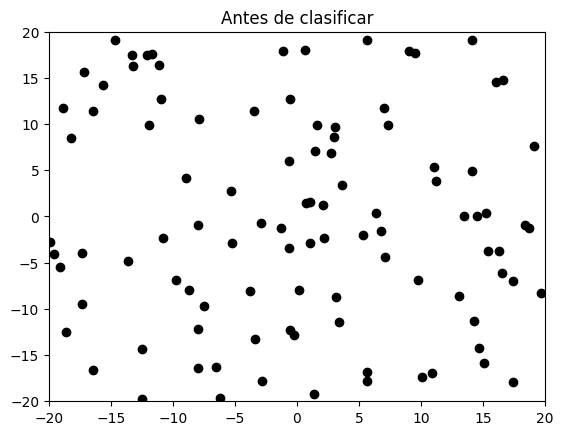

In [5]:
#Graficar los puntos antes de la clasificación
x = puntos[:, 0]
y = puntos[:, 1]
plt.scatter(x, y, color='black')
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.title('Antes de clasificar')
plt.show()

In [6]:
#Red neuronal
#Usamos 4 neuronas de salida, una para cada cuadrante
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(8, input_shape=(2,), activation='relu'))
ann.add(tf.keras.layers.Dense(4, activation='relu'))
ann.add(tf.keras.layers.Dense(4, activation='softmax'))

/home/user/anns-quadrants/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Compilamos la red
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Entrenamos la red con 1000 epocas
ann.fit(puntos, cuadrantes, epochs=1000)

#Predecimos los cuadrantes de los puntos generados
predicciones = ann.predict(puntos)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2481 - loss: 2.3333
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4128 - loss: 2.1992  
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3970 - loss: 2.2643 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4718 - loss: 1.9675 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4850 - loss: 2.0383 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4547 - loss: 1.9789 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4786 - loss: 1.9029 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5097 - loss: 1.8700 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4899 - loss: 1.8411 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4878 - loss: 1.7687 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4930 - loss: 1.6894 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

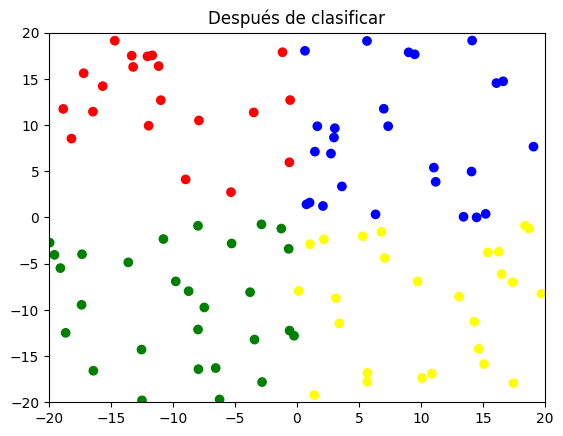

In [8]:
#Clasificamos los puntos en la gráfica
x = puntos[:, 0]
y = puntos[:, 1]
clases = np.argmax(predicciones, axis=1) + 1
colores = np.array(['blue', 'red', 'green', 'yellow'])[clases - 1]

#Se grafica en el plano
plt.scatter(x, y, c=colores)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.title('Después de clasificar')
plt.show()

In [9]:
#Creamos nuevos puntos para ver si los clasifica bien
#Y si la red aprendió
num_n_puntos = 5  #Num de puntos aleatorios
n_puntos = np.random.uniform(low=-20, high=20, size=(num_n_puntos, 2))
n_prediccion = ann.predict(n_puntos)
n_clases = np.argmax(n_prediccion, axis=1) + 1

#Mostrar la clasificación de los nuevos puntos
for i, punto in enumerate(n_puntos):
    cuadrante = n_clases[i]
    print(f"El punto {punto} hace parte del cuadrante {cuadrante}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
El punto [ 17.56350907 -10.36336953] hace parte del cuadrante 4
El punto [-18.4172799   11.85091025] hace parte del cuadrante 2
El punto [10.11719977 -8.30363106] hace parte del cuadrante 4
El punto [  2.75139541 -10.19918234] hace parte del cuadrante 4
El punto [3.49252306 7.25047593] hace parte del cuadrante 1
